{% include toc title="On This Page" icon="file-text" %}

<div class='notice--success' markdown="1">

## <i class="fa fa-graduation-cap" aria-hidden="true"></i> Learning Objectives

After completing this lesson, you will be able to:

* Practice your skills using Landsat data in Python.

</div>


In [1]:
import os
from glob import glob

import matplotlib.pyplot as plt
import geopandas as gpd
import rioxarray as rxr
import xarray as xr
from shapely.geometry import mapping
import numpy as np
import numpy.ma as ma
import earthpy as et
import earthpy.spatial as es
import earthpy.plot as ep


# Download data and set working directory
data = et.data.get_data('cold-springs-fire')
os.chdir(os.path.join(et.io.HOME, 'earth-analytics', 'data'))

<div class="notice--warning alert alert-info" markdown="1">

## <i class="fa fa-pencil-square-o" aria-hidden="true"></i> Challenge 1: Open And Crop Your Data

Above, you opened up the landsat scene in the directory: `LC080340322016072301T1-SC20180214145802`. This data covers 
an area which a file occured near Nederland, Colorado. For this challenge, you will
work with data that was collected before the fire for the same area. 
Do the following:

1. Crop all of the bands (tif files with the word "band" in them,  in the `LC080340322016070701T1-SC20180214145604` directory using **xarray** `concat()` and **rioxarray** `rio.clip()`.
2. Make sure your fire boundary data is in the correct crs before clipping the array!
3. Plot the data using `ep.plot_bands()`

</div>

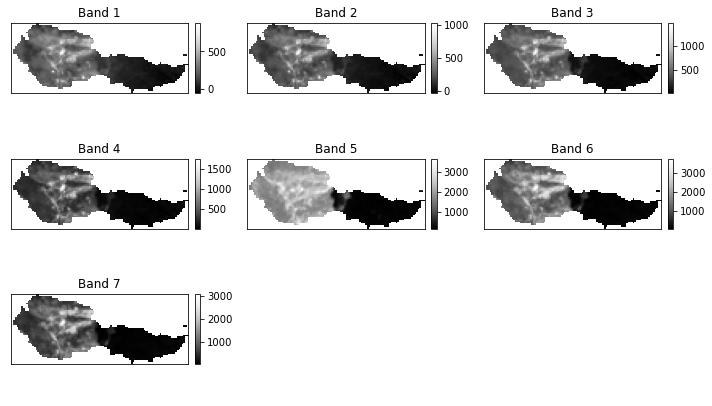

In [2]:
landsat_pre_fire_path = os.path.join("cold-springs-fire",
                                     "landsat_collect",
                                     "LC080340322016070701T1-SC20180214145604",
                                     "crop")

all_landsat_pre_bands = glob(os.path.join(landsat_pre_fire_path,
                                          "*band*.tif"))

all_landsat_pre_bands.sort()

# Open up boundary extent in GeoPandas

fire_boundary_path = os.path.join("cold-springs-fire",
                                  "vector_layers",
                                  "fire-boundary-geomac",
                                  "co_cold_springs_20160711_2200_dd83.shp")

fire_boundary = gpd.read_file(fire_boundary_path)

landsat_pre_bands_list = [rxr.open_rasterio(
    image_path, masked=True).squeeze() for image_path in all_landsat_pre_bands]
pre_arr = xr.concat(landsat_pre_bands_list, dim="band")

fire_boundary_utmz13 = fire_boundary.to_crs(pre_arr.rio.crs)

pre_arr_crop = pre_arr.rio.clip(fire_boundary_utmz13.geometry.apply(mapping))


# TODO - i want to add a suptitle to this plot below but it's not easy to do as desired
# Opened an issue about it in earthpy
ep.plot_bands(pre_arr_crop,
              figsize=(10, 6))

plt.show()

<div class="notice--warning alert alert-info" markdown="1">

## <i class="fa fa-pencil-square-o" aria-hidden="true"></i> Challenge 2 (Optional): Plot CIR and RGB Images Using Landsat 

In <a href="https://www.earthdatascience.org/courses/use-data-open-source-python/multispectral-remote-sensing/landsat-in-Python/" target="_blank">this lesson which introduces working with Landsat data in open source 
    Python, </a> you learn how to plot both a color RGB and Color Infrared (CIR) images
    using landsat data. Create a figure below that has:

1. A color RGB image of the landsat data collected post fire
2. A CIR image of the landsat data collected post fire. 
 
HINT: You will need to set the correct band combinations for your plots to 
turn our properly. You will also have to mask out the nan values for your plot to work.

* For Regular color images use: `rgb=[3, 2, 1]`
* For color infrared use: `rgb=[4, 3, 2]`
</div>



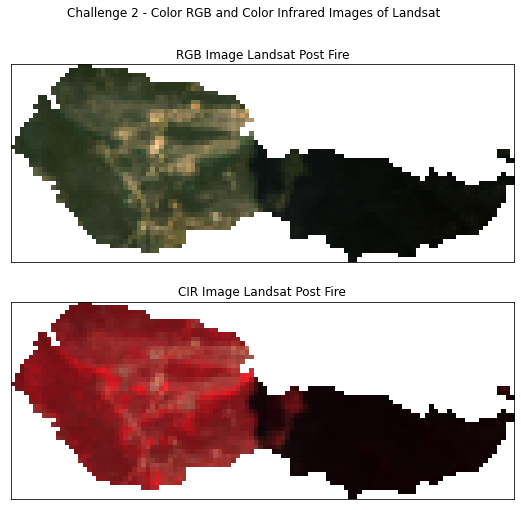

In [3]:
#land_stack, land_meta = es.stack(band_paths=cropped_file_list)

mask_nan = np.isnan(pre_arr_crop)
pre_arr_crop_masked = ma.masked_array(pre_arr_crop, mask=mask_nan)

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))

ep.plot_rgb(pre_arr_crop_masked,
            rgb=[3, 2, 1],
            ax=ax1,
            title="RGB Image Landsat Post Fire")

ep.plot_rgb(pre_arr_crop_masked,
            rgb=[4, 3, 2],
            ax=ax2,
            title="CIR Image Landsat Post Fire")
plt.suptitle("Challenge 2 - Color RGB and Color Infrared Images of Landsat")
plt.show()